<a href="https://colab.research.google.com/github/maxashoka3/transfer-learning-projects/blob/main/pneumonia-detection/chest_xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxashoka","key":"b9a7e6074cdb8aea0f369fde55c833b5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [7]:
!unzip chest-xray-pneumonia.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: dataset/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: d

This is the folder structure.


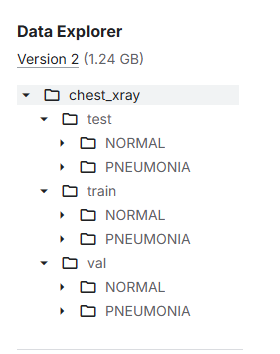

In [8]:
# lets see the number of test image
import os
test_normal = os.listdir("/content/dataset/chest_xray/chest_xray/test/NORMAL")
print("test_normal",len(test_normal))
test_pneumonia = os.listdir("/content/dataset/chest_xray/chest_xray/test/PNEUMONIA")
print("test_pneumonia",len(test_pneumonia))
print("Total testset",len(test_normal)+len(test_pneumonia))
# lets see the number of training image_normal
train_normal = os.listdir("/content/dataset/chest_xray/chest_xray/train/NORMAL")
print("train_normal",len(train_normal))
  # lets see the number of training image_pnumonia
train_pneumonia = os.listdir("/content/dataset/chest_xray/chest_xray/train/PNEUMONIA")
print("train_pneumonia",len(train_pneumonia))
# total images
print("Total trainset",len(train_normal)+len(train_pneumonia))


test_normal 234
test_pneumonia 390
Total testset 624
train_normal 1342
train_pneumonia 3876
Total trainset 5218


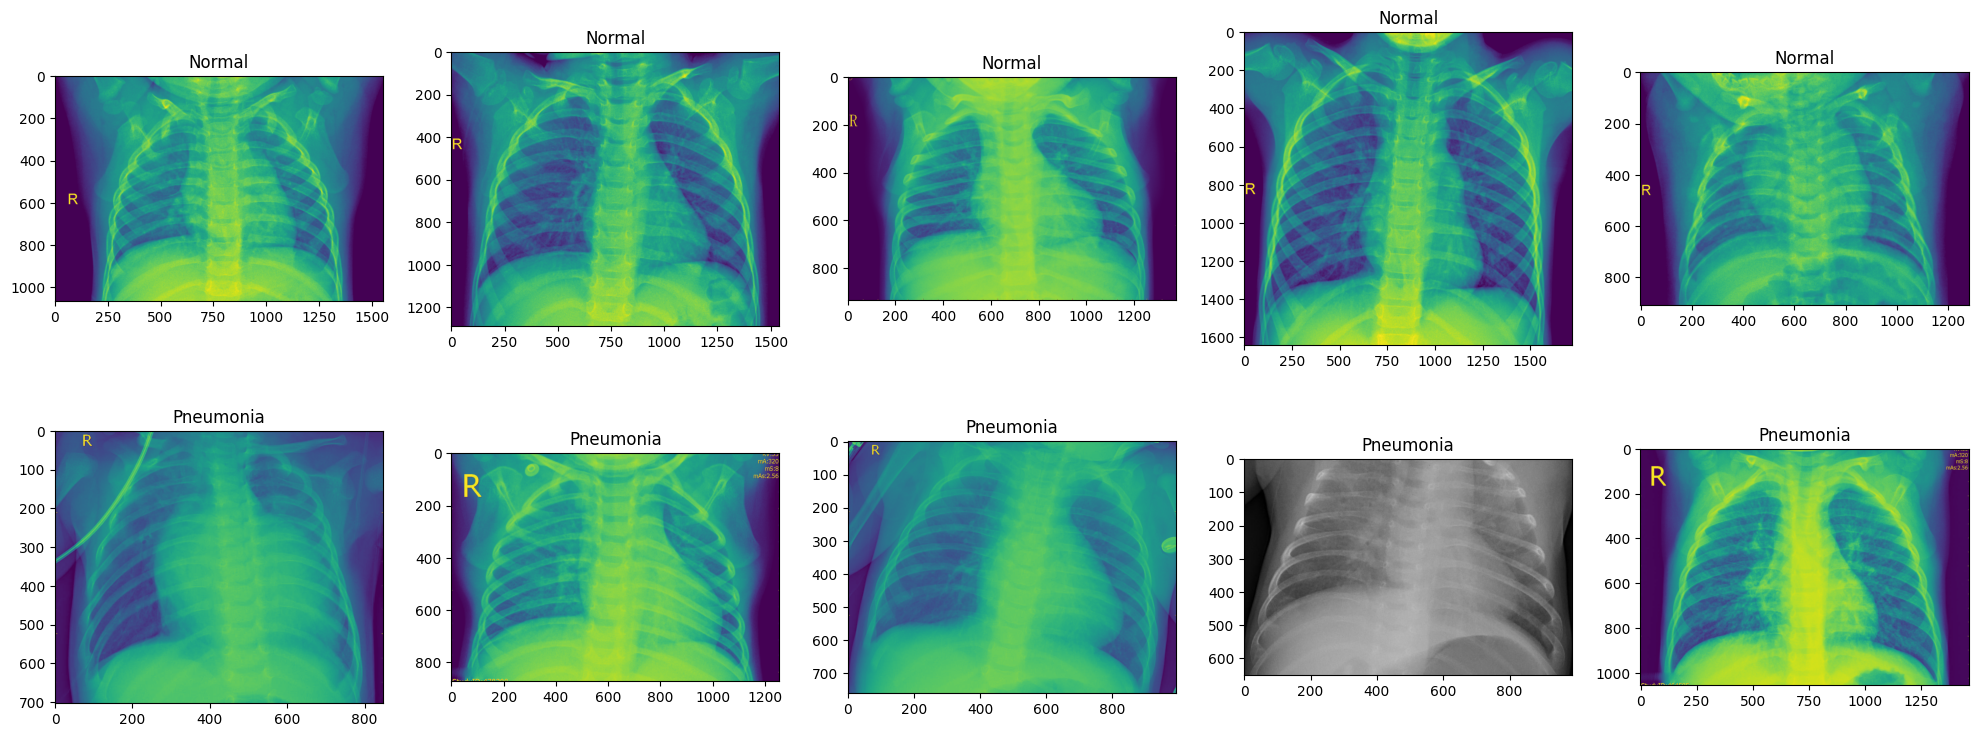

In [9]:
# lets see some of the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# visulizing some of the normal and pneumonia images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i in range(5):
    img_normal = random.choice(os.listdir("/content/dataset/chest_xray/chest_xray/train/NORMAL"))
    img_pneumonia = random.choice(os.listdir("/content/dataset/chest_xray/chest_xray/train/PNEUMONIA"))

    img_normal_path = os.path.join("/content/dataset/chest_xray/chest_xray/train/NORMAL", img_normal)
    img_pneumonia_path = os.path.join("/content/dataset/chest_xray/chest_xray/train/PNEUMONIA", img_pneumonia)

    img_normal = mpimg.imread(img_normal_path)
    img_pneumonia = mpimg.imread(img_pneumonia_path)

    axes[0, i].imshow(img_normal)
    axes[0, i].set_title("Normal")
    axes[1, i].imshow(img_pneumonia)
    axes[1, i].set_title("Pneumonia")

plt.tight_layout()
plt.show()

In [10]:
# calculate and print the ratio of pneumonia to noraml cases in the training set
pneumonia_train_ratio = len(train_pneumonia) / len(train_normal)
print(f"Pneumonia to Normal Ratio in Training Set: {pneumonia_train_ratio}")

Pneumonia to Normal Ratio in Training Set: 2.8882265275707897


In [11]:
pneumonia_train_ratio = len(train_pneumonia) / len(train_normal)
print(f"Pneumonia to Normal Ratio in Training Set: {pneumonia_train_ratio}")

Pneumonia to Normal Ratio in Training Set: 2.8882265275707897


* load the Dataset correctly in TensorFlow

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
# defining the path for directories
train_dir = "/content/dataset/chest_xray/chest_xray/train"
test_dir = "/content/dataset/chest_xray/chest_xray/test"
val_dir = "/content/dataset/chest_xray/chest_xray/val"

In [14]:
# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale= 1./255, rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =  True
)
#only scaling for validation & test sets
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# loading images for training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(224, 224),
    batch_size = 32, class_mode = "binary"
)
# laoding images for validation set
val_generator =  val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size = 32,
    class_mode = "binary"

)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary"
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
# checking class indices
print(dict(train_generator.class_indices))

{'NORMAL': 0, 'PNEUMONIA': 1}


In [17]:
# Lets bring the power of Transfer learning (loading pretrained model)
# We will use VGG16 but lets repalce the top layer to fit our classification task
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall
# loading the pretrained VGG16 but without top layers
base_model = VGG16(weights = "imagenet",#loads a pre-trained VGG16 model from the ImageNet dataset

                   include_top=False, # removes these final classification layers because the original ImageNet classes have multiple layers we replace them with our own custom classification layers tailored to our specific problem.
                   input_shape=(224, 224, 3))
# Freeze base model layers
for layer in base_model.layers:
  layer.trainable = False
 # lets Add custom layers
model =  Sequential([
     base_model,
     Flatten(),
     Dense(512, activation ="relu"),
     Dropout(0.5),
     Dense(1,activation = "sigmoid")  # for binary classification
 ])




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

In [19]:
# model has been changed and changes made sucessfully according to our need
# model compling
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics= ["accuracy", Precision(), Recall()]) # Removed num_classes
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 694ms/step - accuracy: 0.8210 - loss: 0.7270 - precision: 0.8764 - recall: 0.8804 - val_accuracy: 0.7500 - val_loss: 0.3432 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 657ms/step - accuracy: 0.9141 - loss: 0.2015 - precision: 0.9383 - recall: 0.9470 - val_accuracy: 0.8125 - val_loss: 0.4533 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 641ms/step - accuracy: 0.9240 - loss: 0.1839 - precision: 0.9519 - recall: 0.9447 - val_accuracy: 0.8125 - val_loss: 0.3738 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 653ms/step - accuracy: 0.9261 - loss: 0.1774 - precision: 0.9499 - recall: 0.9508 - val_accuracy: 0.7500 - val_loss: 0.5716 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 642ms/step - accuracy: 0.9302 - loss: 0.1702 - precision: 0.9504 - recall: 0.9565 - val_accuracy: 0

In [21]:

# Save trained model
model.save("xray_pneumonia_model.h5")

In [22]:
# Save trained model in the native Keras format
model.save("xray_pneumonia_model_1.keras")

In [23]:
 #testing
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("xray_pneumonia_model.h5")

# Check model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,560,771 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [26]:
# Evaluate the model on test data
test_loss, test_accuracy, precision, recall= model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.9028 - loss: 0.2649 - precision: 0.9199 - recall: 0.9265
Test Accuracy: 92.15%
Precision: 0.93
Recall: 0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


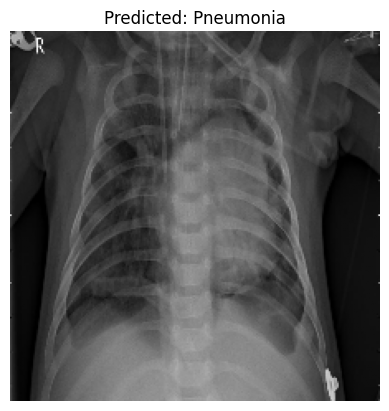

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Define test image path (Change the path to an actual test image)
test_image_path = "/content/dataset/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg"

# Load & Preprocess Image
img = cv2.imread(test_image_path)  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (224, 224))  # Resize to match model input size
img = img / 255.0  # Normalize

# Expand dimensions to match model input shape
img_array = np.expand_dims(img, axis=0)

# Make Prediction
prediction = model.predict(img_array)

# Convert prediction to label
label = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"

# Display Image & Prediction
plt.imshow(img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.33      0.32      0.33       234
   Pneumonia       0.60      0.61      0.60       390

    accuracy                           0.50       624
   macro avg       0.47      0.47      0.47       624
weighted avg       0.50      0.50      0.50       624



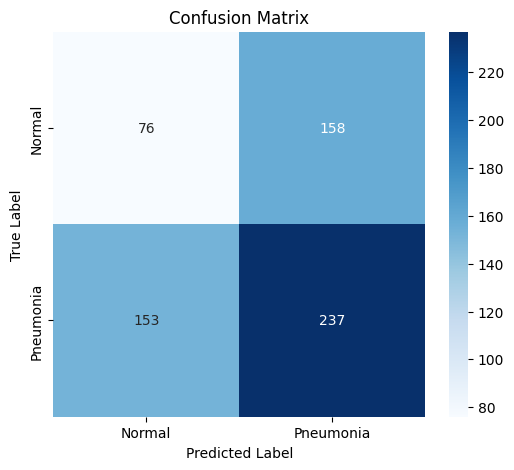

In [29]:
# Get the actual labels
true_labels = test_generator.classes

# Get the predictions
predictions = model.predict(test_generator)
pred_labels = (predictions > 0.5).astype(int)

# Accuracy check
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Normal", "Pneumonia"]))

# Confusion Matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [30]:
# prompt: downlading the model

files.download('xray_pneumonia_model.h5')
files.download('xray_pneumonia_model_1.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.2 MB/s eta 0:00:00


In [32]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("xray_pneumonia_model.h5")

# Function to preprocess the image
def predict_pneumonia(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert to BGR
    image = cv2.resize(image, (224, 224))  # Resize to match model input
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Expand dims for batch

    prediction = model.predict(image)[0][0]
    label = "Pneumonia" if prediction > 0.5 else "Normal"
    confidence = f"{prediction * 100:.2f}% confidence"

    return label, confidence

# Create a Gradio Interface
interface = gr.Interface(
    fn=predict_pneumonia,
    inputs=gr.Image(type="numpy"),
    outputs=["text", "text"],
    title="Pneumonia Detection from X-rays",
    description="Upload a Chest X-ray to check for Pneumonia."
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f5445f783a88139b2b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
